In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import schur
import sys, os
sys.path.append(os.path.abspath('..'))

folder = '../../data/processed_data/extended_data_figure_10/eigs'
datapaths = np.sort([os.path.join(folder, name) for name in os.listdir(folder) if ".npz" in name])

reals = []
imags = []
dotprods = []
upper_triangular = []
eignorm = []

for i in range(27):
    data = np.load(datapaths[i])
    J = data['J']
    eigval, eigvec = np.linalg.eig(J)
    T, Z = schur(J, output='complex')
    upper_triangular.append(T[0,1])
    eignorm.append(np.linalg.norm(np.array([T[0,0],T[1,1]])))
    reals.append(np.real(eigval[0]))
    reals.append(np.real(eigval[1]))
    imags.append(np.imag(eigval[0]))
    imags.append(np.imag(eigval[1]))
    dotprod = np.real(np.conjugate(eigvec[:,0]) @ eigvec[:,1])
    if dotprod < 0:
        dotprod = np.real(np.conjugate(eigvec[:,0]) @ -eigvec[:,1])
    dotprods.append(dotprod)

# Extended Data Figure 10a

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_18312/1528875539.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$Im(\lambda)$', fontsize = 16)
/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_18312/1528875539.py:11: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$Re(\lambda)$', fontsize = 16)


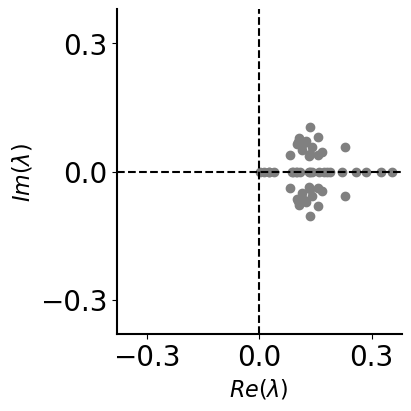

In [2]:
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)

ax.plot(reals, imags, 'o', color='gray')
ax.axhline(y=0, color='black', linestyle='--')
ax.axvline(x=0, color='black', linestyle='--')
ax.set_yticks([-0.3, 0, 0.3])
ax.set_xticks([-0.3, 0, 0.3])
ax.set_xlim([-0.38, 0.38])
ax.set_ylim([-0.38, 0.38])
ax.set_ylabel('$Im(\lambda)$', fontsize = 16)
ax.set_xlabel('$Re(\lambda)$', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)

# Extended Data Figure 10b

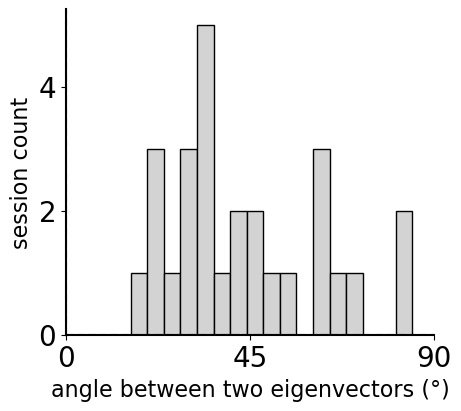

In [3]:
fig, ax = plt.subplots(figsize=(4.5, 4), constrained_layout=True)

ax.hist(np.arccos(dotprods) * 180/np.pi, bins=17, color='lightgray', edgecolor='k')
ax.axhline(y=0, color='black', linestyle='--')
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xticks([0, 45, 90])
ax.set_xlim([0, 90])
ax.set_ylabel('session count', fontsize = 16)
ax.set_xlabel('angle between two eigenvectors (°)', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)

# Extended Data Figure 10c

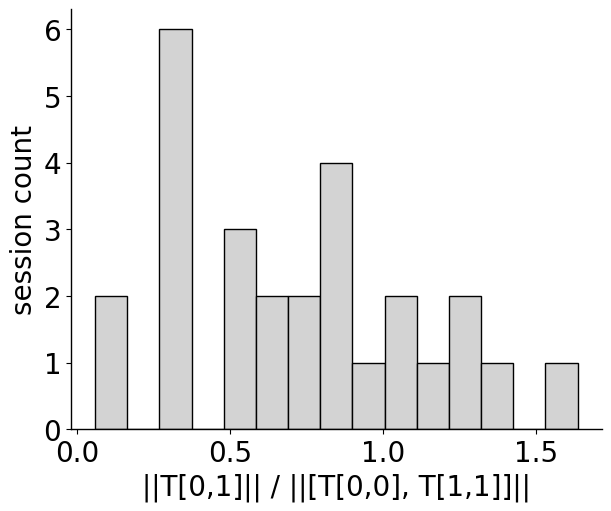

In [4]:
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)

ax.hist(
    np.array(
        [np.linalg.norm(upper_triangular[i]) for i in range(len(upper_triangular))]
    )/eignorm, 
    bins=15, 
    color='lightgray', 
    edgecolor='k'
)

ax.set_xlabel("||T[0,1]|| / ||[T[0,0], T[1,1]]||", fontsize=20)
ax.set_ylabel("session count", fontsize= 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.tick_params(axis='both', which='major', labelsize=20)